<a href="https://colab.research.google.com/github/MatheusrCunha/sistemas-de-controle-2/blob/main/exemplo_primeira_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import control
import matplotlib.pyplot as plt

Teste

In [3]:
n = 1;
d = [1,1];
G = control.tf(n,d);
print("G = \n",G)

G = 
 <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1


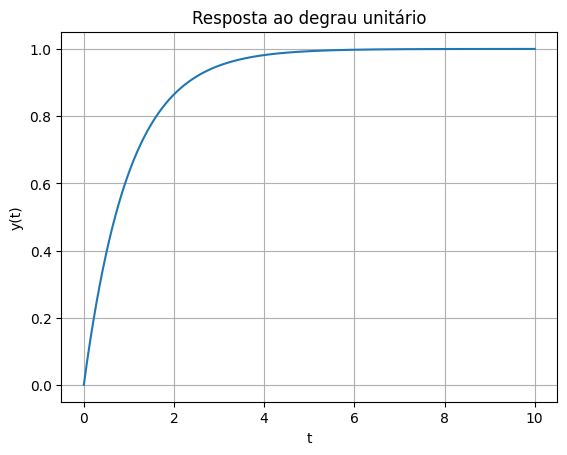

In [4]:
t = np.linspace(0, 10, 999)
x, y = control.step_response(G, t);
plt.figure()
plt.plot(x, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

C = 
 <TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  3 s + 3
  -------
     s
1 states have been removed from the model


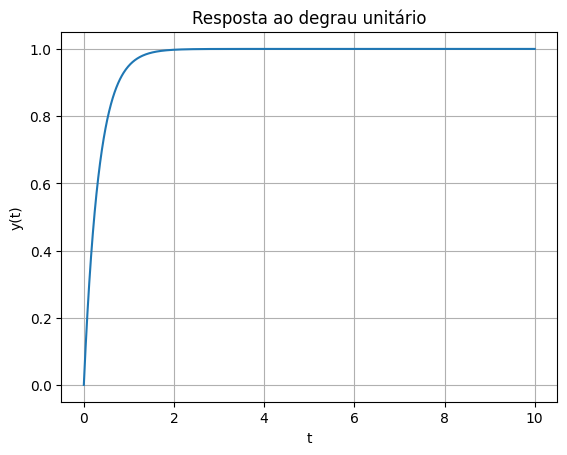

In [7]:
tsnovo  = 1;
Ki = 3;
Kp = 3;
C = control.tf([3, 3],[1, 0]);
print("C = \n", C)
FTMF = control.feedback(C*G,1); #fecha a malha com realimentação unitária.
FTMF = control.minreal(FTMF) #cancela polos e zeros comuns, deixando a FT em forma mínima.

x, y = control.step_response(FTMF, t);
plt.figure()
plt.plot(x, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

In [ ]:
p = control.pole(FTMF);
print("p = \n",p)

p = 
 [-3.]


1 states have been removed from the model


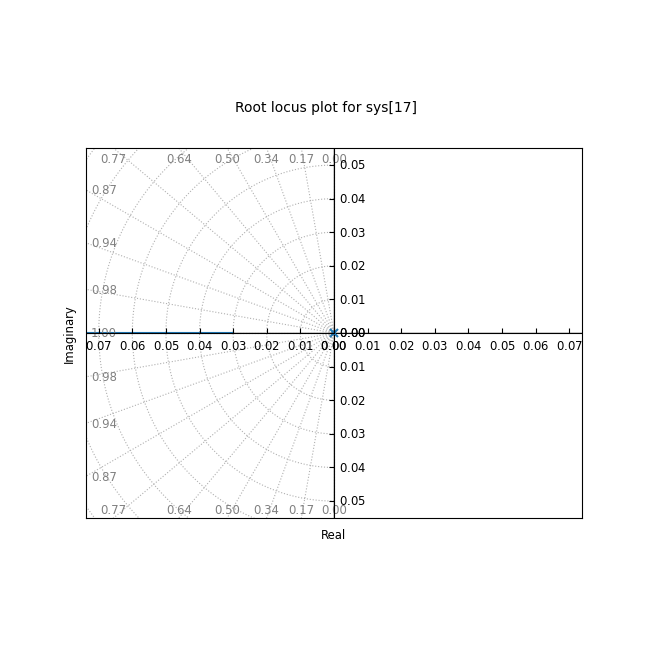

In [9]:
FTMA = control.minreal(C*G);
k = np.linspace(0.01, 1000, 100)
r = control.root_locus(FTMA, k) #?